### Plotting all CCBOR biweekly water sampling data with quarterly data from John Stolz's group

#### Overlaid sites (see other notebook for separated site plots)

In [1]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from scipy.stats import kde
from matplotlib import cm
import datetime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [2]:
# read from csv 
biweek = pd.read_csv("/home/millieginty/Documents/git-repos/ccbor/data/biweekly/ccbor-biweekly-stolz.csv", parse_dates=['date'])

biweek.head()

,site,date,latitude,longitude,epsg3857_x,epsg3857_y,Sampling time,Watershed,Location,Samplers,...,W(mg/L),Pb(mg/L),Bi(mg/L),U(mg/L),Methane,Ethane,Ethene,Propane,Propylene,Butane
0,1,2021-08-13,40.464786,-82.854767,-9.223350e+06,4.933715e+06,11:00:00 AM,West Branch Alum Creek,Upstream,"CH, BL, KM, SB, JP",...,bdl,0.0002,bdl,0.0025,16.0,bdl,bdl,bdl,NaN,NaN
1,1,2021-09-03,40.464786,-82.854767,-9.223350e+06,4.933715e+06,11:00:00 AM,West Branch Alum Creek,Upstream,"CH, BL, SB",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2021-09-17,40.464786,-82.854767,-9.223350e+06,4.933715e+06,11:00:00 AM,West Branch Alum Creek,Upstream,"BL, KM",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2021-10-01,40.464786,-82.854767,-9.223350e+06,4.933715e+06,10:51:00 AM,West Branch Alum Creek,Upstream,"CH, KM, BK",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2021-10-15,40.464786,-82.854767,-9.223350e+06,4.933715e+06,10:42:00 AM,West Branch Alum Creek,Upstream,"CH, KM, CO",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
## Split the dataframe into site-specific dataframes

biweek1 = biweek[biweek['site'] == 1] # West Branch Alum Creek, upstream
biweek2 = biweek[biweek['site'] == 2] # West Branch Alum Creek, downstream 1
biweek3 = biweek[biweek['site'] == 3] # West Branch Alum Creek, downstream 2
biweek4 = biweek[biweek['site'] == 4] # Headwaters Alum Creek, upstream
biweek5 = biweek[biweek['site'] == 5] # Headwaters Alum Creek, downstream
biweek6 = biweek[biweek['site'] == 6] # Headwaters Alum Creek, intermediate 2
biweek7 = biweek[biweek['site'] == 7] # Headwaters Alum Creek, intermediate 1
biweek8 = biweek[biweek['site'] == 8] # Headwaters Big Walnut Creek, downstream
biweek9 = biweek[biweek['site'] == 9] # Little Walnut Creek, downstream

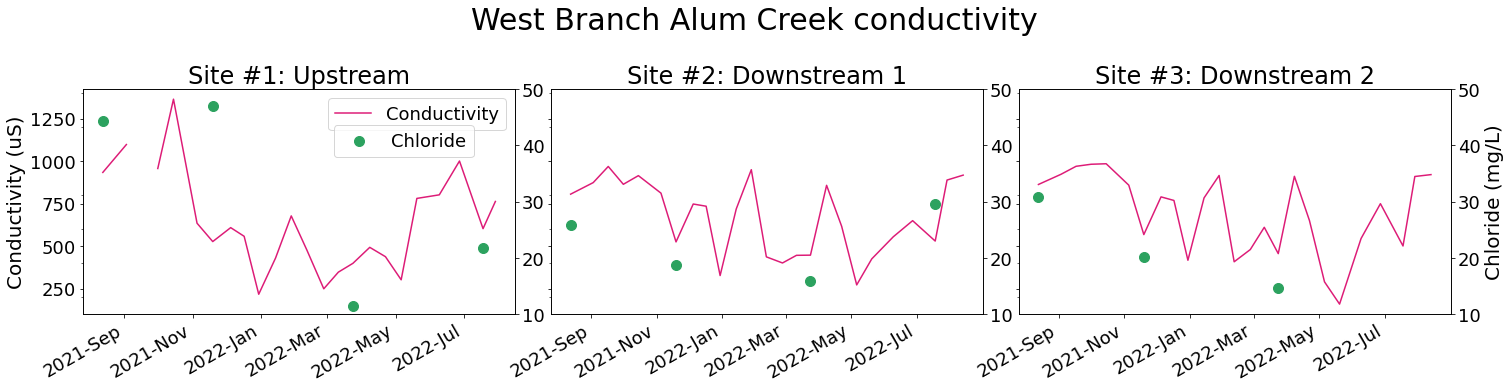

In [4]:
#West Branch Alum Creek sites (1-3) AKA Turkey Run

fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey = True)
fig.suptitle('West Branch Alum Creek conductivity ', fontsize=30, y = 1.2)
fig.tight_layout(pad=2.08, w_pad=2)

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

# Site 1
axes[0].plot(biweek1.date, biweek1.cond, c = '#dd1c77', label='Conductivity') 

ax0 = axes[0].twinx() # Add another y axis
ax0.set_ylim([10, 50]) # set y axis range
biweek1.plot.scatter(x="date", y="Chloride", ax=ax0, c = '#2ca25f', s = 100, label='Chloride') # Add in chloride
ax0.tick_params(axis='y', labelsize=18)
#ax0.set_ylabel('Chloride (mg/L)', size=MEDIUM_SIZE)
ax0.set_ylabel('')
ax0.legend(loc='upper right', bbox_to_anchor=(0.925, 0.88), fontsize = SMALL_SIZE)

axes[0].set_xticklabels(biweek1.date, rotation = 85, size=SMALL_SIZE)
axes[0].tick_params(axis='y', labelsize=18)
axes[0].set_ylabel('Conductivity (uS)', size=MEDIUM_SIZE)
axes[0].set_title('Site #1: Upstream', size=BIGGER_SIZE)
axes[0].legend(loc='upper right', fontsize = SMALL_SIZE)

axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in axes[0].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

# Site 2
axes[1].plot(biweek2.date, biweek2.cond, c = '#dd1c77')

ax1 = axes[1].twinx() # Add another y axis
ax1.set_ylim([10, 50]) # set y axis range
biweek2.plot.scatter(x="date", y="Chloride", ax=ax1, c = '#2ca25f', s = 100) # Add in chloride
ax1.tick_params(axis='y', labelsize=18)
#ax1.set_ylabel('Chloride (mg/L)', size=MEDIUM_SIZE)
ax1.set_ylabel('')

axes[1].set_xticklabels(biweek2.date, rotation = 85, size=SMALL_SIZE)
axes[1].set_title('Site #2: Downstream 1', size=BIGGER_SIZE)


axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in axes[1].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
    
# Site 3
axes[2].plot(biweek3.date, biweek3.cond, c = '#dd1c77')

ax2 = axes[2].twinx() # Add another y axis
ax2.set_ylim([10, 50]) # set y axis range
biweek3.plot.scatter(x="date", y="Chloride", ax=ax2, c = '#2ca25f', s = 100) # Add in chloride
ax2.tick_params(axis='y', labelsize=18)
ax2.set_ylabel('Chloride (mg/L)', size=MEDIUM_SIZE)

axes[2].set_xticklabels(biweek3.date, rotation = 85, size=SMALL_SIZE)
axes[2].set_title('Site #3: Downstream 2', size=BIGGER_SIZE)

axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in axes[2].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
    
   # fig.legend(fontsize = SMALL_SIZE)
    ;

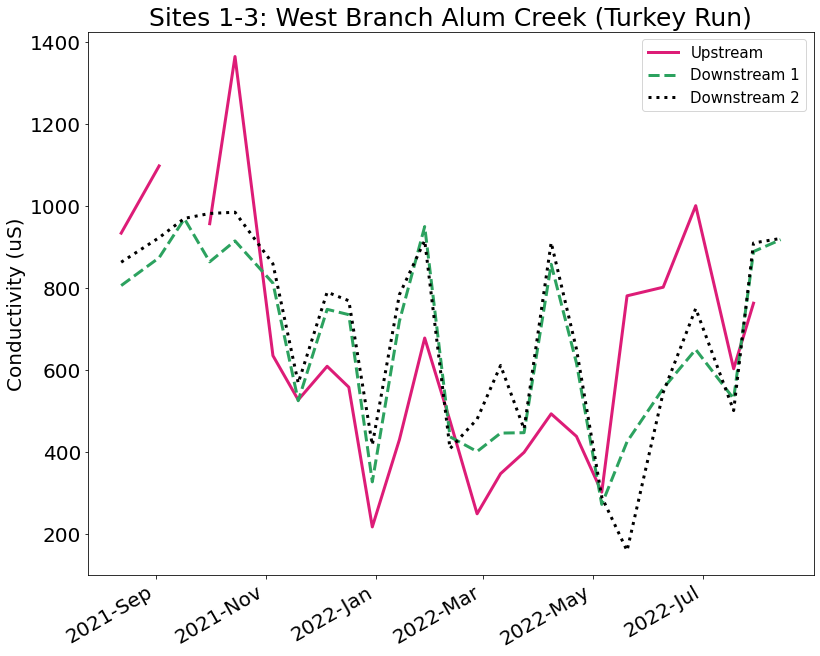

In [42]:
fig, ax = plt.subplots(figsize=(13, 10))

# Varaibles
small = 15
med = 20
large = 25
linew = 3

# Plotting things 

ax.plot(biweek1.date, biweek1.cond, c = '#dd1c77', label='Upstream', linewidth=linew) # Site 1
ax.plot(biweek2.date, biweek2.cond, c = '#2ca25f', label='Downstream 1', linewidth=linew, linestyle = '--') # Site 2
ax.plot(biweek3.date, biweek3.cond, c = 'black', label='Downstream 2', linewidth=linew, linestyle = ':') # Site 3

ax.tick_params(axis='y', labelsize= med)
ax.set_xticklabels(biweek1.date, rotation = 85, size= med)
ax.set_ylabel('Conductivity (uS)', size= med)
ax.set_title('Sites 1-3: West Branch Alum Creek (Turkey Run)', size= large)

ax.legend(loc='upper right', fontsize = small)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()

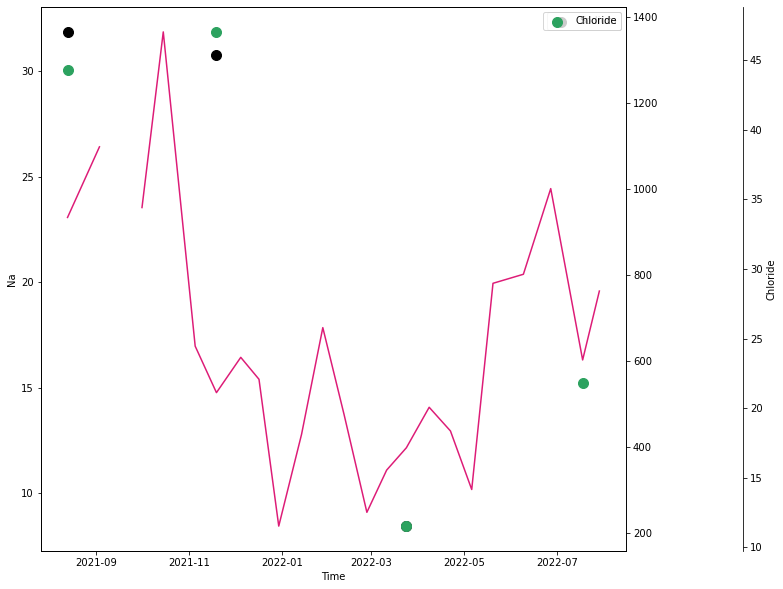

In [16]:
fig, ax = plt.subplots(figsize=(13, 10))

# Twin the x-axis twice to make independent y-axes.
axes = [ax, ax.twinx(), ax.twinx()]

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
axes[-1].spines['right'].set_position(('axes', 1.2))

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
axes[-1].set_frame_on(True)
axes[-1].patch.set_visible(False)

# Plotting things 

axes[1].plot(biweek1.date, biweek1.cond, c = '#dd1c77', label='Conductivity') 

#axes[0].plot(biweek1.date, biweek1.Na, c = 'black', label='Sodium') 
biweek1.plot.scatter(x="date", y="Na", ax=axes[0], c = 'black', s = 100, label='Sodium') 

biweek1.plot.scatter(x="date", y="Chloride", ax=axes[-1], c = '#2ca25f', s = 100, label='Chloride') 

axes[0].set_xlabel('Time')

plt.show()

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(25, 4), sharey = True)
fig.suptitle('Headwaters Alum Creek conductivity', fontsize=BIGGER_SIZE, y = 1.2)
fig.tight_layout() 

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

# Site 4
axes[0].plot(biweek4.date, biweek4.cond, c = '#dd1c77', label = 'Conductivity')

ax0 = axes[0].twinx() # Add another y axis
ax0.set_ylim([10, 50]) # set y axis range
biweek4.plot.scatter(x="date", y="Chloride", ax=ax0, c = '#2ca25f', s = 100, label='Chloride') # Add in chloride
ax0.tick_params(axis='y', labelsize=18)
#ax0.set_ylabel('Chloride (mg/L)', size=MEDIUM_SIZE)
ax0.set_ylabel('')
ax0.legend(loc='upper right', bbox_to_anchor=(0.925, 0.88), fontsize = SMALL_SIZE)

axes[0].set_xticklabels(biweek4.date, rotation = 85, size=SMALL_SIZE)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_ylabel('Conductivity (uS)', size=MEDIUM_SIZE)
axes[0].set_title('Site # 4: Upstream', size=BIGGER_SIZE)
axes[0].legend(loc='upper right', fontsize = SMALL_SIZE)

axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in axes[0].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
    
# Site 7
axes[1].plot(biweek7.date, biweek7.cond, c = '#dd1c77')

ax1 = axes[1].twinx() # Add another y axis
ax1.set_ylim([10, 50]) # set y axis range
biweek7.plot.scatter(x="date", y="Chloride", ax=ax1, c = '#2ca25f', s = 100) # Add in chloride
ax1.tick_params(axis='y', labelsize=18)
#ax1.set_ylabel('Chloride (mg/L)', size=MEDIUM_SIZE)
ax1.set_ylabel('')

axes[1].set_xticklabels(biweek7.date, rotation = 85, size=SMALL_SIZE)
axes[1].set_title('Site # 7: Intermediate 1', size=BIGGER_SIZE)

axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in axes[1].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

# Site 6
axes[2].plot(biweek6.date, biweek6.cond, c = '#dd1c77')

ax2 = axes[2].twinx() # Add another y axis
ax2.set_ylim([10, 50]) # set y axis range
biweek6.plot.scatter(x="date", y="Chloride", ax=ax2, c = '#2ca25f', s = 100) # Add in chloride
ax2.tick_params(axis='y', labelsize=18)
#ax2.set_ylabel('Chloride (mg/L)', size=MEDIUM_SIZE)
ax2.set_ylabel('')

axes[2].set_xticklabels(biweek6.date, rotation = 85, size=SMALL_SIZE)
axes[2].set_title('Site # 6: Intermediate 2', size=BIGGER_SIZE)

axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in axes[2].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

# Site 5
axes[3].plot(biweek5.date, biweek5.cond, c = '#dd1c77')

ax3 = axes[3].twinx() # Add another y axis
ax3.set_ylim([10, 50]) # set y axis range
biweek5.plot.scatter(x="date", y="Chloride", ax=ax3, c = '#2ca25f', s = 100) # Add in chloride
ax3.tick_params(axis='y', labelsize=18)
ax3.set_ylabel('Chloride (mg/L)', size=MEDIUM_SIZE)

axes[3].set_xticklabels(biweek5.date, rotation = 85, size=SMALL_SIZE)
axes[3].set_title('Site # 5: Downstream', size=BIGGER_SIZE)

axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in axes[3].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right');

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4), sharey = True)
fig.suptitle('Headwaters Big and Little Walnut Creeks conductivity', fontsize=BIGGER_SIZE, y = 1.2)
fig.tight_layout(pad = 3) 

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

axes[0].plot(biweek8.date, biweek8.cond, c = '#dd1c77', label = 'Conductivity')

ax0 = axes[0].twinx() # Add another y axis
ax0.set_ylim([10, 150]) # set y axis range
biweek8.plot.scatter(x="date", y="Chloride", ax=ax0, c = '#2ca25f', s = 100, label='Chloride') # Add in chloride
ax0.tick_params(axis='y', labelsize=18)
#ax0.set_ylabel('Chloride (mg/L)', size=MEDIUM_SIZE)
ax0.set_ylabel('')
ax0.legend(loc='upper right', bbox_to_anchor=(0.925, 0.88), fontsize = SMALL_SIZE)

axes[0].set_xticklabels(biweek4.date, rotation = 85, size=SMALL_SIZE)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_ylabel('Conductivity (uS)', size=MEDIUM_SIZE)
axes[0].set_title('Site # 8: Downstream', size=BIGGER_SIZE)
axes[0].legend(loc='upper right', fontsize = SMALL_SIZE)

# Text in the x axis will be displayed in 'YYYY-mm' format.
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in axes[0].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

axes[1].plot(biweek9.date, biweek9.cond, c = '#dd1c77')

ax1 = axes[1].twinx() # Add another y axis
ax1.set_ylim([10, 150]) # set y axis range
biweek9.plot.scatter(x="date", y="Chloride", ax=ax1, c = '#2ca25f', s = 100) # Add in chloride
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylabel('Chloride (mg/L)', size=MEDIUM_SIZE)

axes[1].set_xticklabels(biweek7.date, rotation = 85, size=SMALL_SIZE)
axes[1].set_title('Site # 9: Downstream', size=BIGGER_SIZE)

# Text in the x axis will be displayed in 'YYYY-mm' format.
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in axes[1].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right');